<a href="https://colab.research.google.com/github/Krish6115/MLLab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- A1: Class Separation Analysis ---
Crop 'apple' Centroid: [ 20.8        134.22       199.89        22.63094241  92.33338288
   5.92966293 112.65477928]
Crop 'banana' Centroid: [100.23        82.01        50.05        27.37679831  80.35812258
   5.98389318 104.6269804 ]

Crop 'apple' Spread (Std Dev): [11.80423653  8.09886412  3.30422457  0.8232561   1.45123991  0.26758355
  7.06738123]
Crop 'banana' Spread (Std Dev): [11.0515655   7.65179064  3.36563516  1.42119928  2.79141818  0.26929318
  9.35104076]

Interclass Centroid Distance: 178.09
----------------------------------------

--- A2: Feature Density ('N') ---
Histogram Data (Counts per bin): [771 559 303 416 151]
Bin Edges: [  0.  28.  56.  84. 112. 140.]
Mean: 50.55
Variance: 1362.27



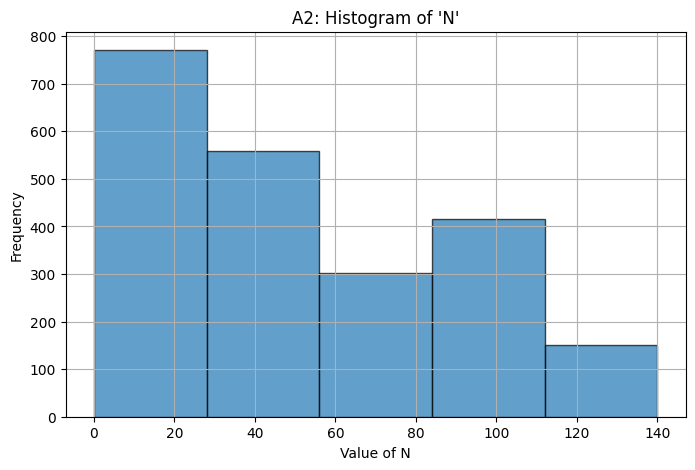

----------------------------------------

--- A3: Minkowski Distance Analysis ---
Comparing Rows #0 and #1100
Minkowski r=1: 262.70
Minkowski r=2: 148.33
Minkowski r=3: 129.34
Minkowski r=4: 122.28
Minkowski r=5: 118.76
Minkowski r=6: 116.73
Minkowski r=7: 115.48
Minkowski r=8: 114.66
Minkowski r=9: 114.12
Minkowski r=10: 113.75


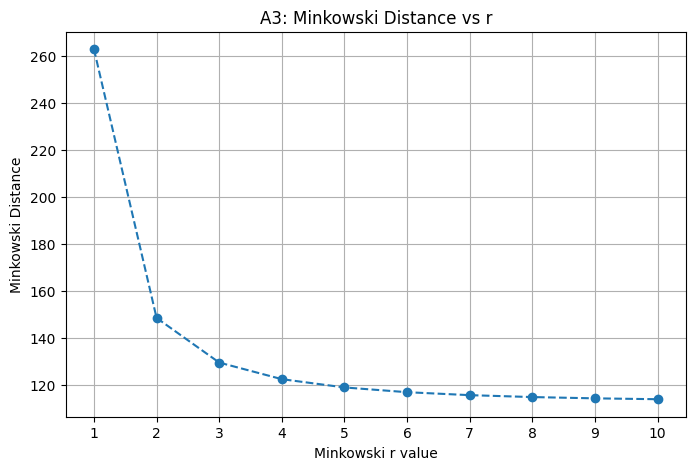

----------------------------------------

--- A4: Splitting Dataset ---
Total samples: 2200
Training samples: 1540
Testing samples: 660
----------------------------------------

--- A5: Train k-NN Classifier (k=3) ---
k-NN classifier trained!
----------------------------------------

--- A6: Test Accuracy for k=3 ---
Test Accuracy (k=3): 0.98
----------------------------------------

--- A7: Prediction Behavior ---
Predictions on test set: ['kidneybeans' 'mothbeans' 'blackgram' 'jute' 'jute' 'kidneybeans'
 'papaya' 'mango']
True labels:            ['kidneybeans' 'mothbeans' 'blackgram' 'jute' 'jute' 'kidneybeans'
 'papaya' 'mango']
Single test vector prediction: ['kidneybeans']
Actual label: ['kidneybeans' 'mothbeans' 'blackgram' 'jute' 'jute' 'kidneybeans'
 'papaya' 'mango' 'coffee' 'maize' 'rice' 'papaya' 'coconut' 'orange'
 'mango' 'banana' 'lentil' 'chickpea' 'blackgram' 'cotton' 'mango'
 'muskmelon' 'banana' 'kidneybeans' 'pigeonpeas' 'papaya' 'jute' 'mango'
 'kidneybeans' 'grapes

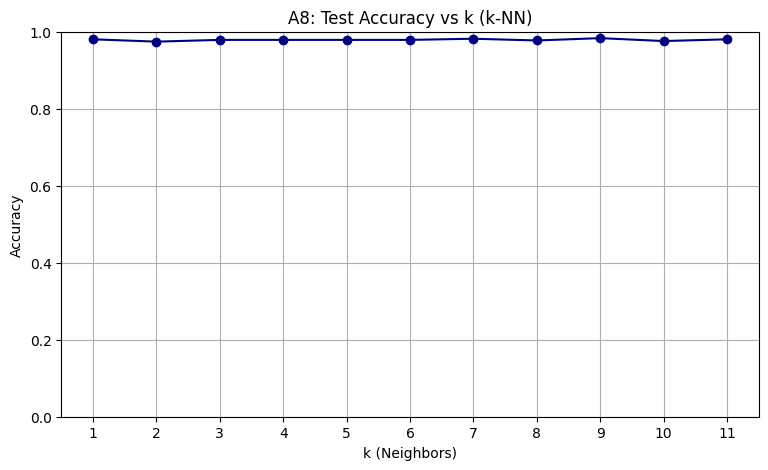

----------------------------------------

--- A9: Performance Metrics (k=3) ---

--- Training Data ---
Confusion Matrix:
 [[70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 69  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 69  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 69  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 70  0  0  0 

In [2]:
# ==================== Imports and Reading New Dataset ====================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import os

# Use your sent file (if on Colab, upload and use path below)
csv_file_path = "Crop_recommendation.csv"
df = pd.read_csv(csv_file_path)

# Split features and label
X = df.drop('label', axis=1).values
y = df['label'].values

# Get all unique class names
class_names = np.unique(y)

# =========================== Function Definitions ===========================

def evaluate_class_separation(class_a_features, class_b_features):
    centroid_a = np.mean(class_a_features, axis=0)
    centroid_b = np.mean(class_b_features, axis=0)
    spread_a = np.std(class_a_features, axis=0)
    spread_b = np.std(class_b_features, axis=0)
    interclass_dist = np.linalg.norm(centroid_a - centroid_b)
    return centroid_a, centroid_b, spread_a, spread_b, interclass_dist

def analyze_feature_density(feature_vector):
    hist_data, bin_edges = np.histogram(feature_vector, bins=5)
    mean_val = np.mean(feature_vector)
    variance_val = np.var(feature_vector)
    return hist_data, bin_edges, mean_val, variance_val

def calculate_minkowski_series(vector1, vector2, max_r):
    distances = []
    r_values = range(1, max_r + 1)
    for r in r_values:
        distance = np.linalg.norm(vector1 - vector2, ord=r)
        distances.append(distance)
    return list(r_values), distances

def split_data(feature_matrix, target_vector, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        feature_matrix, target_vector, test_size=test_size, random_state=random_state, stratify=target_vector
    )
    return X_train, X_test, y_train, y_test

def train_knn(features_train, labels_train, n_neighbors=3):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(features_train, labels_train)
    return classifier

def evaluate_accuracy(classifier, features_test, labels_test):
    accuracy = classifier.score(features_test, labels_test)
    return accuracy

def get_predictions(classifier, features_test):
    return classifier.predict(features_test)

def predict_single_vector(classifier, vector):
    return classifier.predict(vector.reshape(1, -1))

def get_knn_accuracy_for_k_range(features_train, labels_train, features_test, labels_test, max_k):
    k_values = range(1, max_k + 1)
    accuracies = []
    for k in k_values:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(features_train, labels_train)
        accuracy = classifier.score(features_test, labels_test)
        accuracies.append(accuracy)
    return list(k_values), accuracies

def evaluate_performance(classifier, features_train, labels_train, features_test, labels_test):
    y_train_pred = classifier.predict(features_train)
    y_test_pred = classifier.predict(features_test)
    cm_train = confusion_matrix(labels_train, y_train_pred, labels=class_names)
    cm_test = confusion_matrix(labels_test, y_test_pred, labels=class_names)
    report_train = classification_report(labels_train, y_train_pred, zero_division=0)
    report_test = classification_report(labels_test, y_test_pred, zero_division=0)
    return cm_train, report_train, cm_test, report_test

# =========================== Main Program  ===============================

if __name__ == '__main__':

    # --- A1: Class Separation (first two unique crop types) ---
    print("--- A1: Class Separation Analysis ---")
    crop_a, crop_b = class_names[:2]
    class_a_features = df[df['label'] == crop_a].drop('label', axis=1).values
    class_b_features = df[df['label'] == crop_b].drop('label', axis=1).values
    cA, cB, sA, sB, class_dist = evaluate_class_separation(class_a_features, class_b_features)
    print(f"Crop '{crop_a}' Centroid: {cA}")
    print(f"Crop '{crop_b}' Centroid: {cB}\n")
    print(f"Crop '{crop_a}' Spread (Std Dev): {sA}")
    print(f"Crop '{crop_b}' Spread (Std Dev): {sB}\n")
    print(f"Interclass Centroid Distance: {class_dist:.2f}")
    print("-" * 40 + "\n")

    # --- A2: Feature Density for 'N' (first numeric feature) ---
    print("--- A2: Feature Density ('N') ---")
    feature_x = df.columns[0]
    fvec = df[feature_x].values
    hist_counts, bin_edges, mean_f, var_f = analyze_feature_density(fvec)
    print(f"Histogram Data (Counts per bin): {hist_counts}")
    print(f"Bin Edges: {bin_edges}")
    print(f"Mean: {mean_f:.2f}")
    print(f"Variance: {var_f:.2f}\n")
    plt.figure(figsize=(8, 5))
    plt.hist(fvec, bins=bin_edges, edgecolor='black', alpha=0.7)
    plt.title(f"A2: Histogram of '{feature_x}'")
    plt.xlabel(f"Value of {feature_x}")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    print("-" * 40 + "\n")

    # --- A3: Minkowski Distances, compare two random data points ---
    print("--- A3: Minkowski Distance Analysis ---")
    idx1, idx2 = 0, len(X)//2
    vA, vB = X[idx1], X[idx2]
    r_vals, m_dists = calculate_minkowski_series(vA, vB, 10)
    print(f"Comparing Rows #{idx1} and #{idx2}")
    for r, d in zip(r_vals, m_dists):
        print(f"Minkowski r={r}: {d:.2f}")
    plt.figure(figsize=(8, 5))
    plt.plot(r_vals, m_dists, marker='o', linestyle='--')
    plt.title("A3: Minkowski Distance vs r")
    plt.xlabel("Minkowski r value")
    plt.ylabel("Minkowski Distance")
    plt.grid(True)
    plt.xticks(r_vals)
    plt.show()
    print("-" * 40 + "\n")

    # --- A4: Split Data ---
    print("--- A4: Splitting Dataset ---")
    X_train, X_test, y_train, y_test = split_data(X, y)
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    print("-" * 40 + "\n")

    # --- A5: Train kNN (k=3) ---
    print("--- A5: Train k-NN Classifier (k=3) ---")
    knn_model_k3 = train_knn(X_train, y_train, n_neighbors=3)
    print("k-NN classifier trained!")
    print("-" * 40 + "\n")

    # --- A6: Test Accuracy ---
    print("--- A6: Test Accuracy for k=3 ---")
    test_acc = evaluate_accuracy(knn_model_k3, X_test, y_test)
    print(f"Test Accuracy (k=3): {test_acc:.2f}")
    print("-" * 40 + "\n")

    # --- A7: Prediction Demonstration ---
    print("--- A7: Prediction Behavior ---")
    preds_test = get_predictions(knn_model_k3, X_test)
    print(f"Predictions on test set: {preds_test[:8]}")
    print(f"True labels:            {y_test[:8]}")
    single_vec = X_test[0]
    single_pred = predict_single_vector(knn_model_k3, single_vec)
    print(f"Single test vector prediction: {single_pred}")
    print(f"Actual label: {y_test}")
    print("-" * 40 + "\n")

    # --- A8: Vary k and Plot Accuracy ---
    print("--- A8: k-NN Accuracy vs k ---")
    max_k = 11
    k_vals, accs = get_knn_accuracy_for_k_range(X_train, y_train, X_test, y_test, max_k)
    for k, acc in zip(k_vals, accs):
        print(f"k = {k}, Accuracy = {acc:.2f}")
    plt.figure(figsize=(9, 5))
    plt.plot(k_vals, accs, marker='o', linestyle='-', color='navy')
    plt.title("A8: Test Accuracy vs k (k-NN)")
    plt.xlabel("k (Neighbors)")
    plt.ylabel("Accuracy")
    plt.xticks(k_vals)
    plt.ylim([0, 1])
    plt.grid(True)
    plt.show()
    print("-" * 40 + "\n")

    # --- A9: Confusion Matrix & Metrics (k=3) ---
    print("--- A9: Performance Metrics (k=3) ---")
    cm_train, rep_train, cm_test, rep_test = evaluate_performance(knn_model_k3, X_train, y_train, X_test, y_test)
    print("\n--- Training Data ---")
    print("Confusion Matrix:\n", cm_train)
    print("Classification Report:\n", rep_train)
    print("\n--- Test Data ---")
    print("Confusion Matrix:\n", cm_test)
    print("Classification Report:\n", rep_test)

    train_acc = evaluate_accuracy(knn_model_k3, X_train, y_train)
    print(f"\nTraining Accuracy: {train_acc:.2f}")
    print(f"Test Accuracy:    {test_acc:.2f}")

    if train_acc > test_acc and (train_acc - test_acc) > 0.1:
        print("INFERENCE: The model might be OVERFITTING.")
    elif train_acc < 0.8 and test_acc < 0.8:
        print("INFERENCE: The model might be UNDERFITTING.")
    else:
        print("INFERENCE: GOOD FIT (No obvious over/underfitting).")

    print("-" * 50)

